<a href="https://colab.research.google.com/github/Izuho/computer-graphics/blob/main/9-17/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import distutils
if distutils.version.LooseVersion(tf.__version__) <= '2.0':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [2]:
print('学習用写真 : ', x_train.shape, '\n学習用ラベル : ', y_train.shape, '\nテスト用写真 : ', x_test.shape, '\nテスト用ラベル : ', y_test.shape)

学習用写真 :  (60000, 28, 28) 
学習用ラベル :  (60000,) 
テスト用写真 :  (10000, 28, 28) 
テスト用ラベル :  (10000,)


In [13]:
latent_dim = 64 

class Autoencoder(tf.keras.models.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(784, activation='sigmoid'),
      tf.keras.layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [17]:
autoencoder.compile(optimizer='adam', 
                    loss=tf.keras.losses.MeanSquaredError(),
                    metrics=['accuracy'])

Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0089 - accuracy: 0.2233 - val_loss: 0.0090 - val_accuracy: 0.2188
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0088 - accuracy: 0.2235 - val_loss: 0.0089 - val_accuracy: 0.2222
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0088 - accuracy: 0.2244 - val_loss: 0.0089 - val_accuracy: 0.2225
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0088 - accuracy: 0.2250 - val_loss: 0.0089 - val_accuracy: 0.2220
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0087 - accuracy: 0.2255 - val_loss: 0.0089 - val_accuracy: 0.2192
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0087 - accuracy: 0.2258 - val_loss: 0.0089 - val_accuracy: 0.2243
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0087 - accuracy: 0.2264 - val_loss: 0.0089 - val_accuracy:

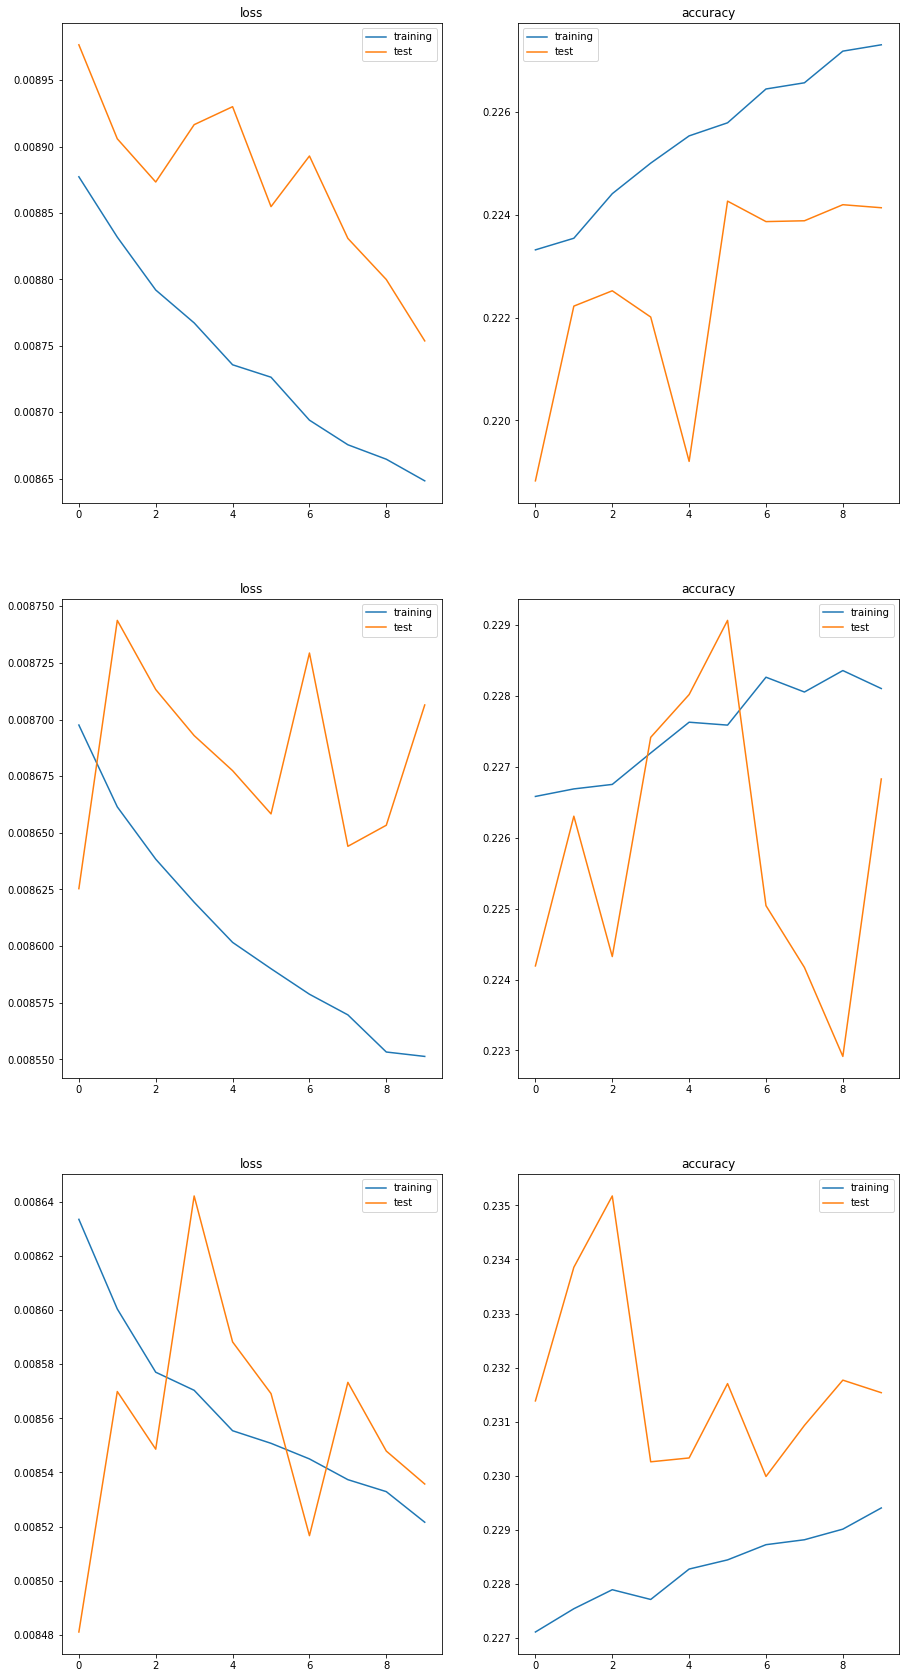

In [18]:
import matplotlib.pyplot as plt
import numpy as np
#KFoldのインポート
from sklearn.model_selection import KFold
 

K = 3
#KFoldの設定
kf = KFold(n_splits = K, shuffle = True, random_state = 1)
j = 0
plt.figure(figsize=(15, 30))  # グラフを表示するスペースを用意
 
#交差検証
for train, test in kf.split(x_train):
    
    history = autoencoder.fit(x_train[train],
                        x_train[train],
                        validation_data = (x_train[test], x_train[test]), 
                        epochs = 10)

    metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

    for i in range(len(metrics)):
        j += 1

        metric = metrics[i]

        plt.subplot(3, 2, j)
        plt.title(metric)  # グラフのタイトルを表示
    
        plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
        plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す
    
        plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
        plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
        plt.legend()  # ラベルの表示
    
plt.show()  # グラフの表示

In [19]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

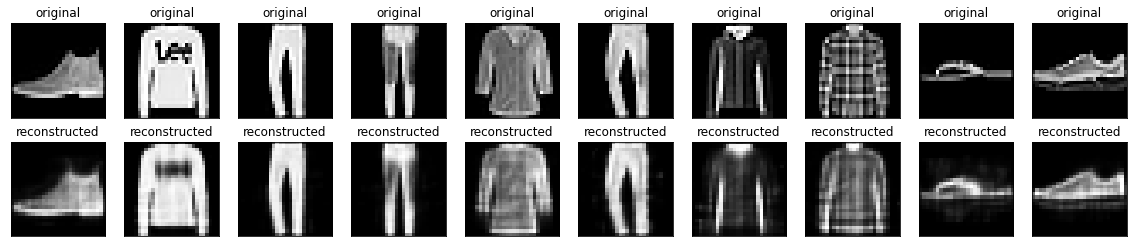

In [20]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()